In [ ]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
sudo apt-get install -f

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,559 kB]
Get:14 https://r2u.stat

In [ ]:
!pip install chromedriver-py
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00


In [ ]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from tqdm.notebook import tqdm
import pandas as pd
import json
import pprint
from chromedriver_py import binary_path
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
chrome_options = webdriver.ChromeOptions()  # Initialize Chrome options
chrome_options.add_argument('--headless')  # Run Chrome in headless mode - In our local notebook we can remove the `--headless` option.
chrome_options.add_argument('--no-sandbox')  # Disable Chrome’s default sandboxing behavior
chrome_options.add_argument('--disable-dev-shm-usage')  # Overcome limited resource problems
chrome_options.add_argument("window-size=1900,800")  # Set the window size for the browser
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")  # Set a custom user agent

In [ ]:
service = Service(executable_path=binary_path)  # Create a Service object with the path to the ChromeDriver executable
wd = webdriver.Chrome(service=service, options=chrome_options)  # Initialize the WebDriver with the specified service and options

In [ ]:
wd.get('https://www.repubblica.it/')

In [ ]:
def show_page():
    wd.save_screenshot('screenshot.png')

    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    img = mpimg.imread('/content/screenshot.png')
    plt.figure(figsize=(20, 10))
    imgplot = plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

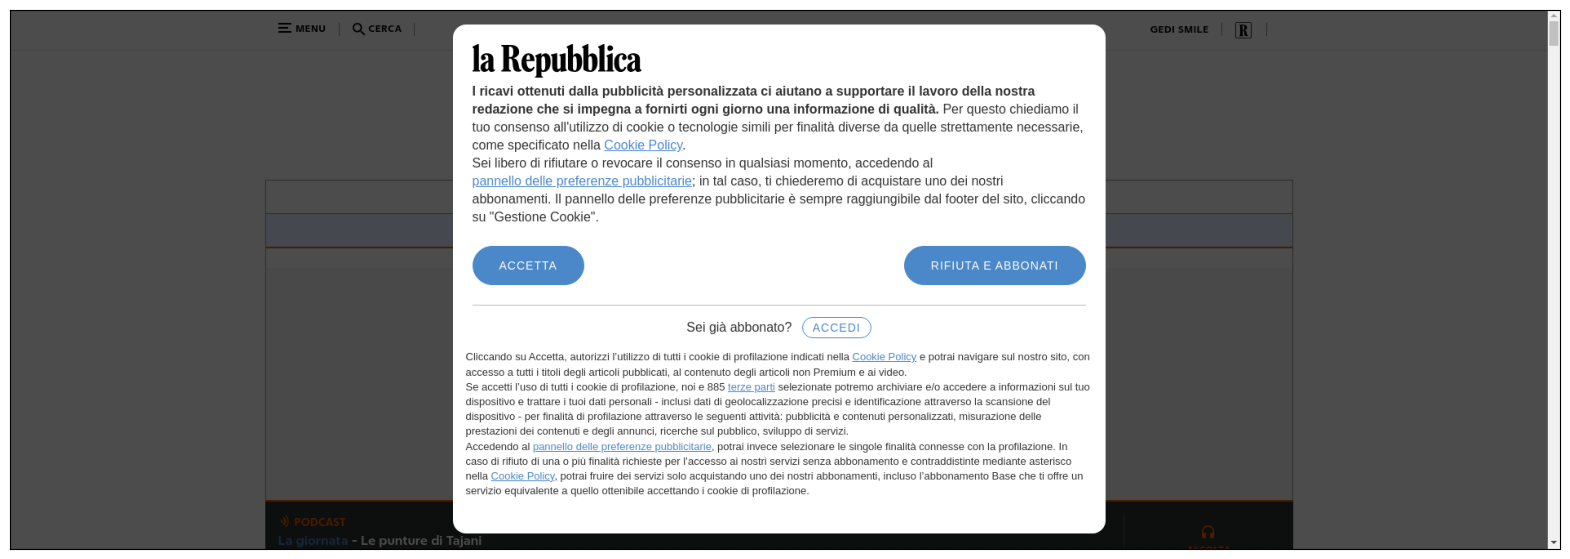

In [ ]:
show_page()

In [ ]:
try:
  wd.find_elements(By.CSS_SELECTOR, '.iubenda-cs-accept-btn.iubenda-cs-btn-primary')[0].click()
except:
  print('Cookie già accettati')

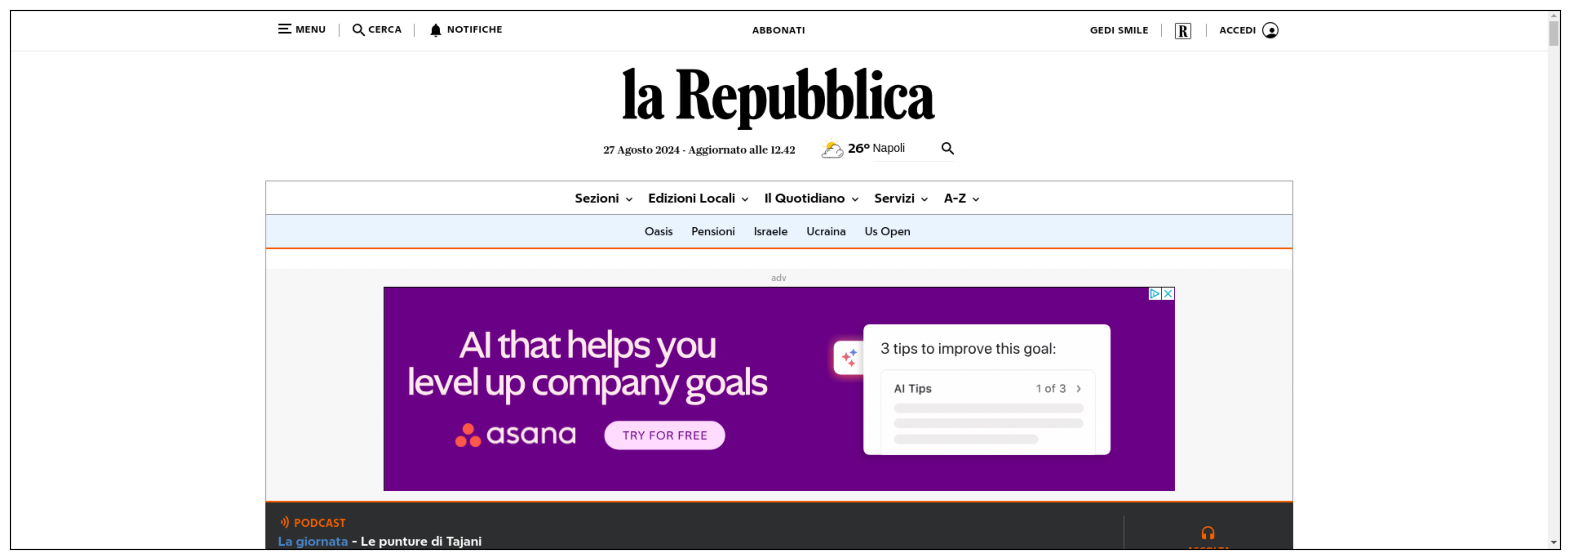

In [ ]:
time.sleep(3)

show_page()

In [ ]:
wd.find_elements(By.CSS_SELECTOR, 'span.header-login-label')[0].click()

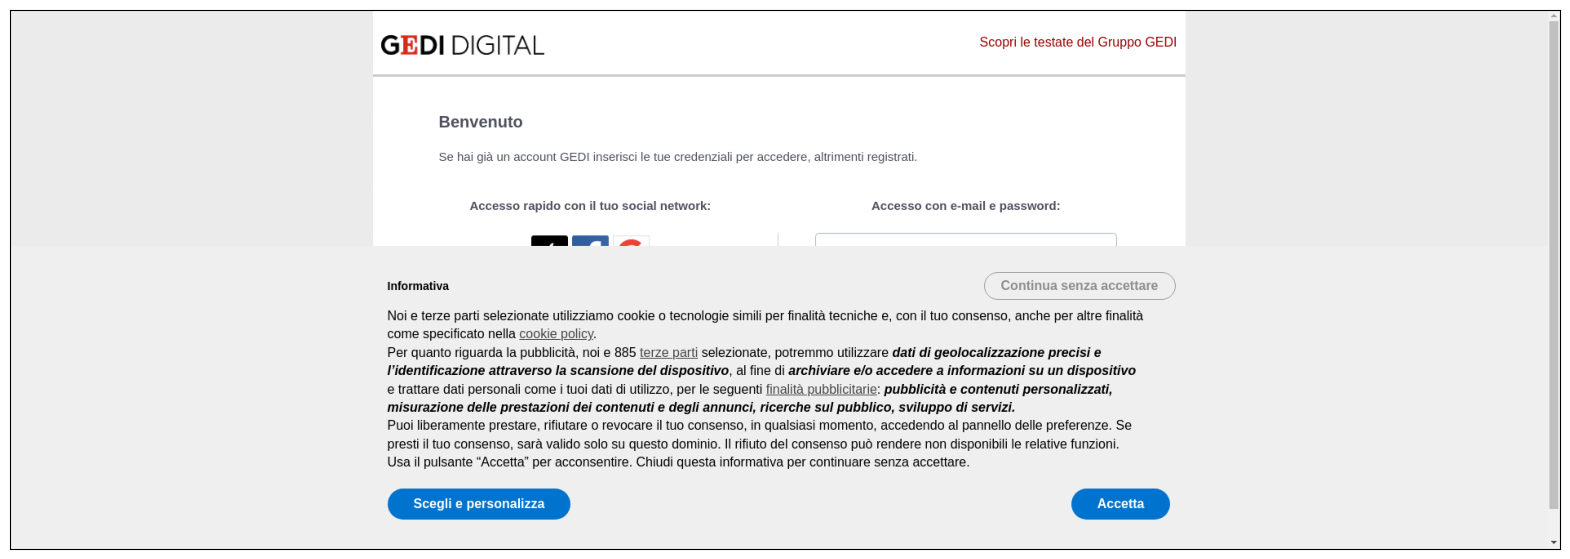

In [ ]:
time.sleep(5)

show_page()

In [ ]:
try:
  wd.find_elements(By.CSS_SELECTOR, '.iubenda-cs-accept-btn.iubenda-cs-btn-primary')[0].click()
except:
  print('Cookie già accettati')

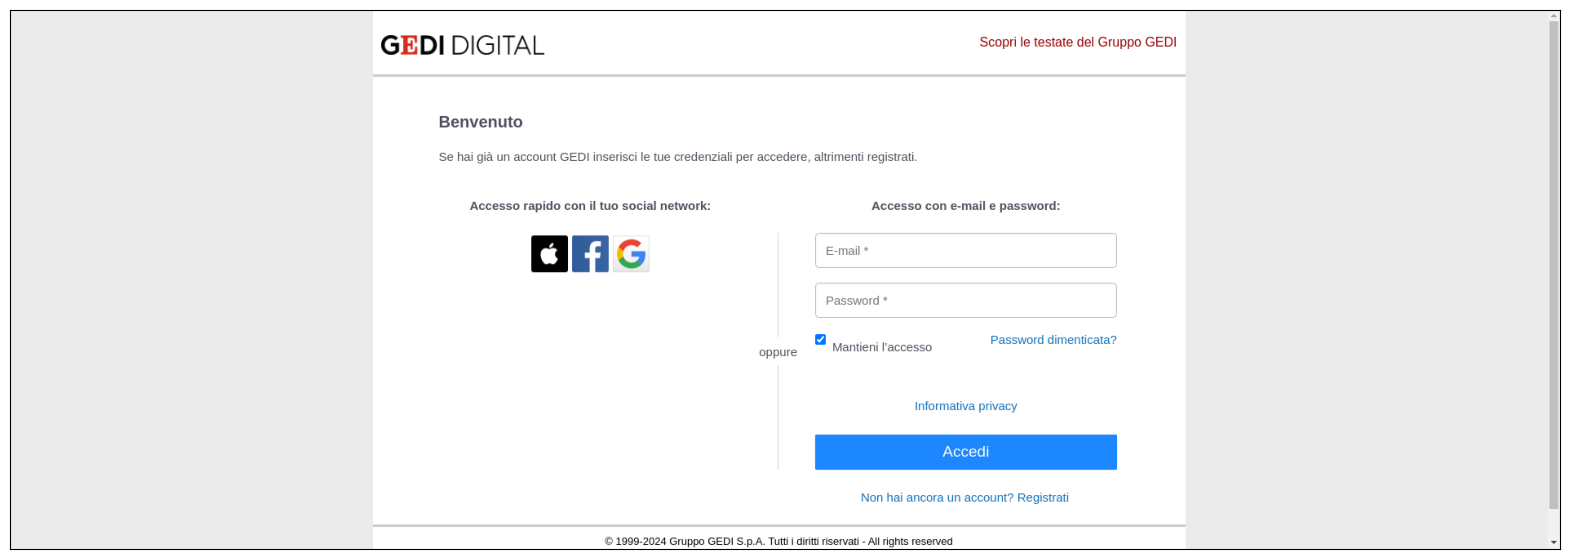

In [ ]:
time.sleep(7)

show_page()

In [ ]:
login = wd.find_elements(By.CSS_SELECTOR, "input.gigya-input-text")[21]
login.send_keys("c.gomezherrera@campus.unimib.it")

In [ ]:
password = wd.find_elements(By.CSS_SELECTOR, "input.gigya-input-password")[11]
password.send_keys("Repubblica2024!")

In [ ]:
login.send_keys(Keys.RETURN)

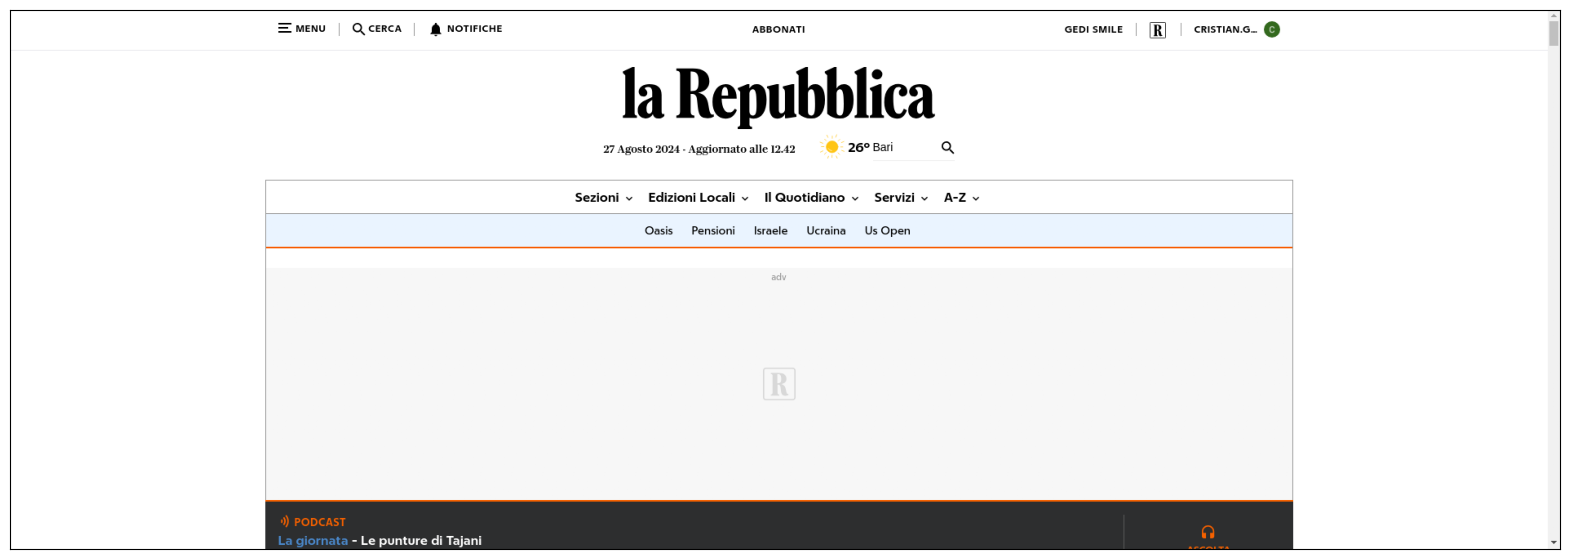

In [ ]:
time.sleep(16)

show_page()

In [ ]:
wd.find_elements(By.CSS_SELECTOR, "button.rep-slim-header__item.rep-slim-header__search-button.hide-on-mobile")[0].send_keys(Keys.RETURN)

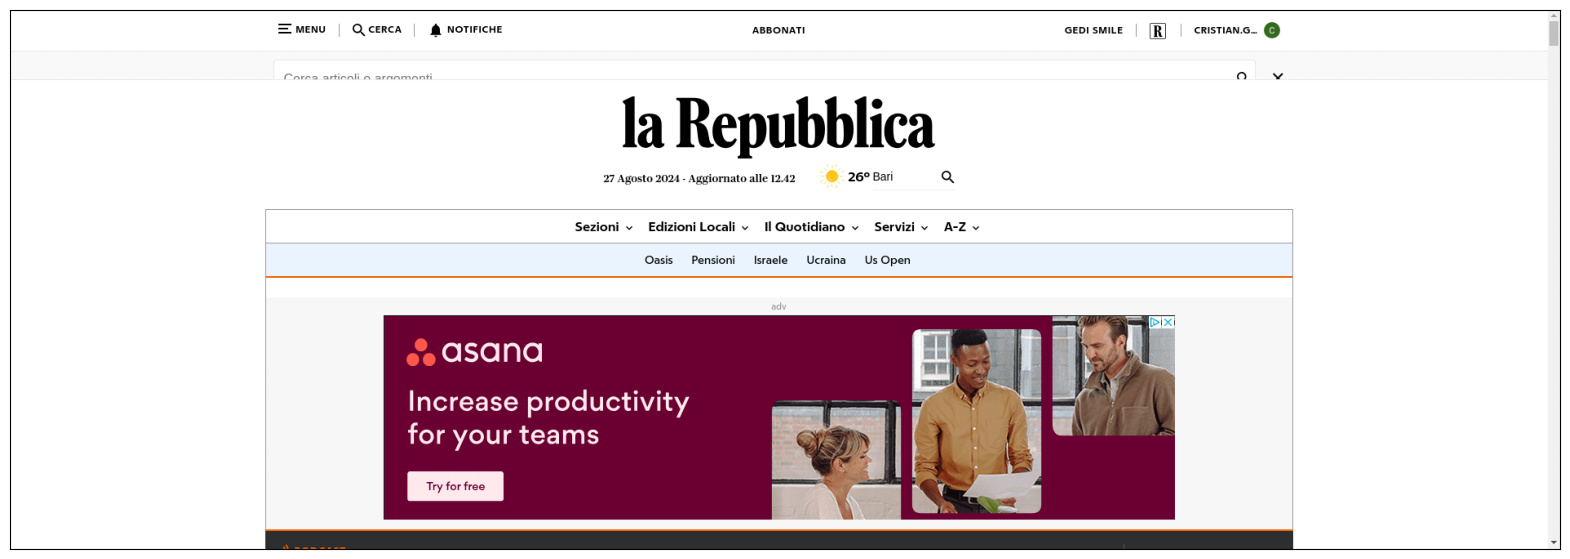

In [ ]:
show_page()

In [ ]:
search = wd.find_elements(By.CSS_SELECTOR, "input[placeholder='Cerca articoli o argomenti']")[0]
search.send_keys("siccità")

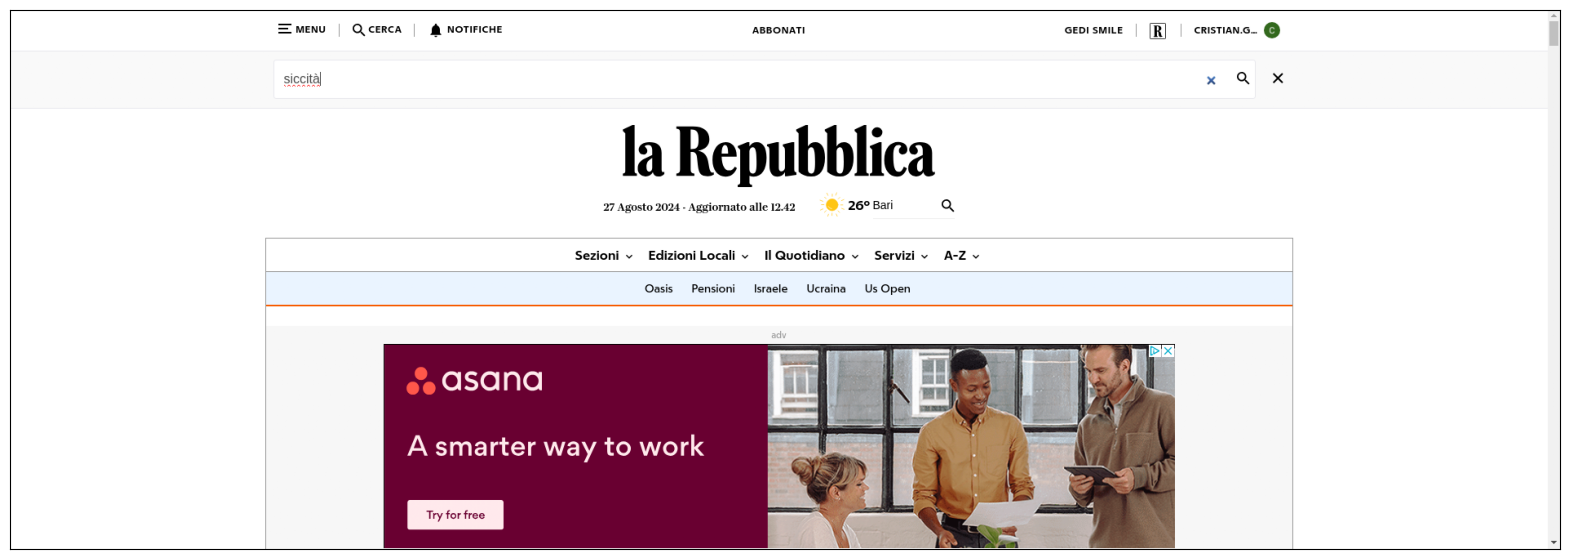

In [ ]:
time.sleep(6)

show_page()

In [ ]:
search.send_keys(Keys.RETURN)

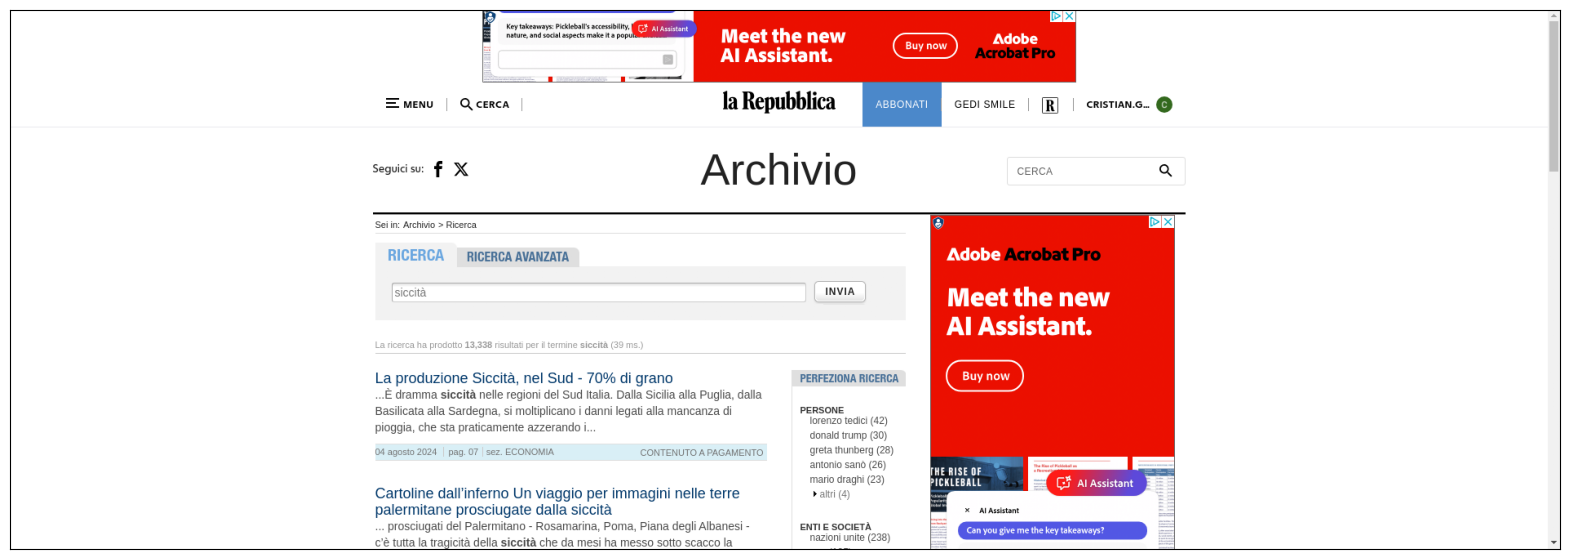

In [ ]:
time.sleep(22)

show_page()

In [ ]:
wd.find_elements(By.CSS_SELECTOR, "a.tab2")[0].send_keys(Keys.RETURN)

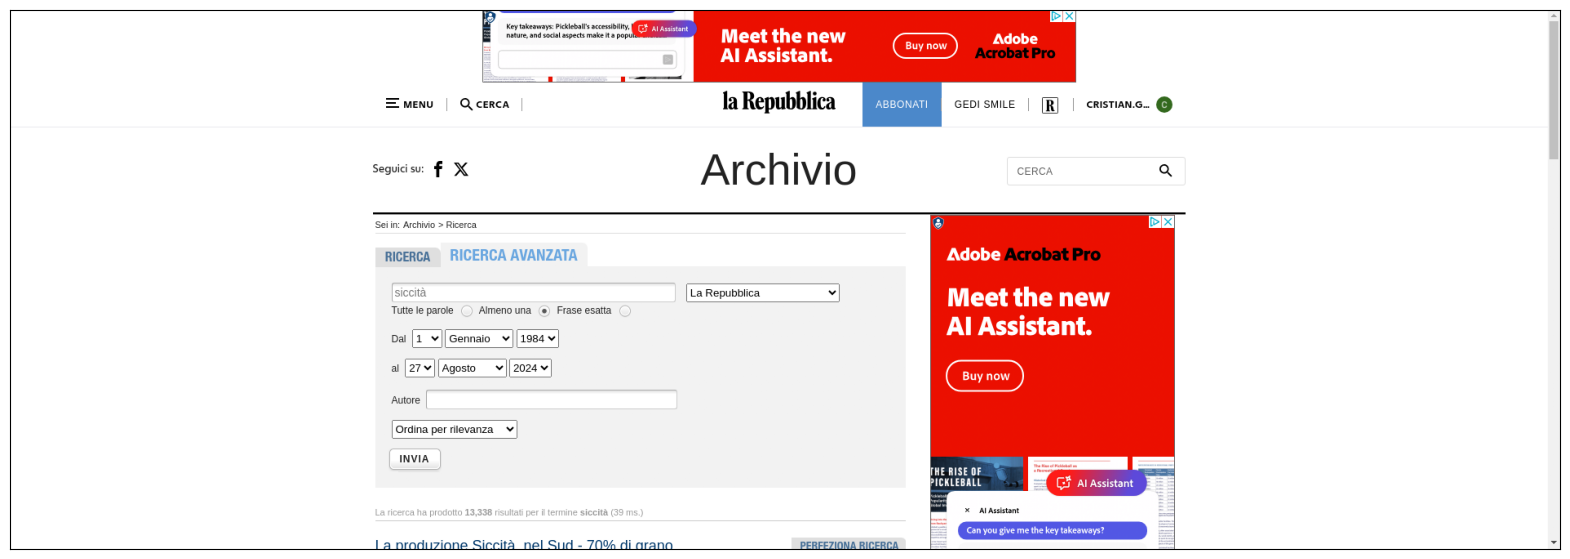

In [ ]:
show_page()

In [ ]:
anno_from = wd.find_elements(By.ID, "from_yyyy")[0]
anno_from.send_keys("2024")

In [ ]:
mese_from = wd.find_elements(By.ID, "from_mm")[0]
mese_from.send_keys("Agosto")

In [ ]:
anno_to = wd.find_elements(By.ID, "to_yyyy")[0]
anno_to.send_keys("2024")

In [ ]:
mese_to = wd.find_elements(By.ID, "to_mm")[0]
mese_to.send_keys("Agosto")

In [ ]:
giorno_to = wd.find_elements(By.ID, "to_dd")[0]
giorno_to.send_keys("26")

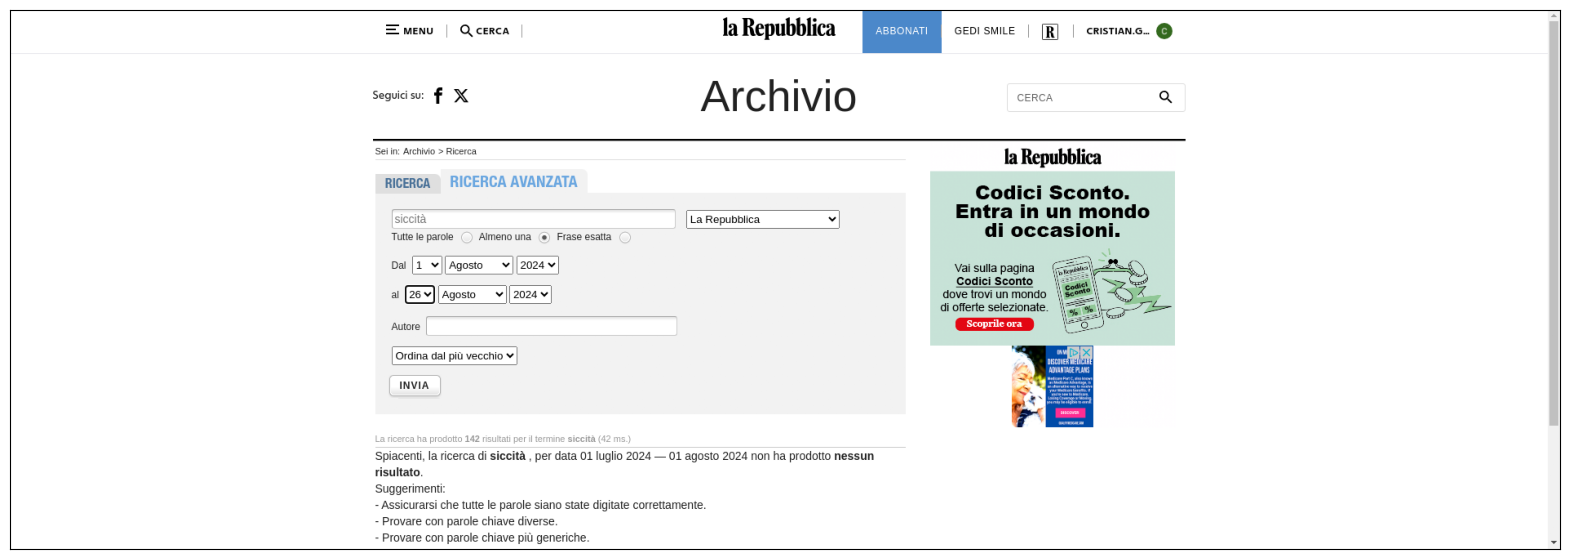

In [ ]:
show_page()

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# Trova l'elemento <select> nel DOM
sort = Select(wd.find_element(By.NAME, "sortby"))

# Seleziona l'opzione con il value "adate" (che corrisponde a "Ordina dal più vecchio")
sort.select_by_value("adate")

In [ ]:
wd.find_elements(By.CSS_SELECTOR, "div.button")[1].click()

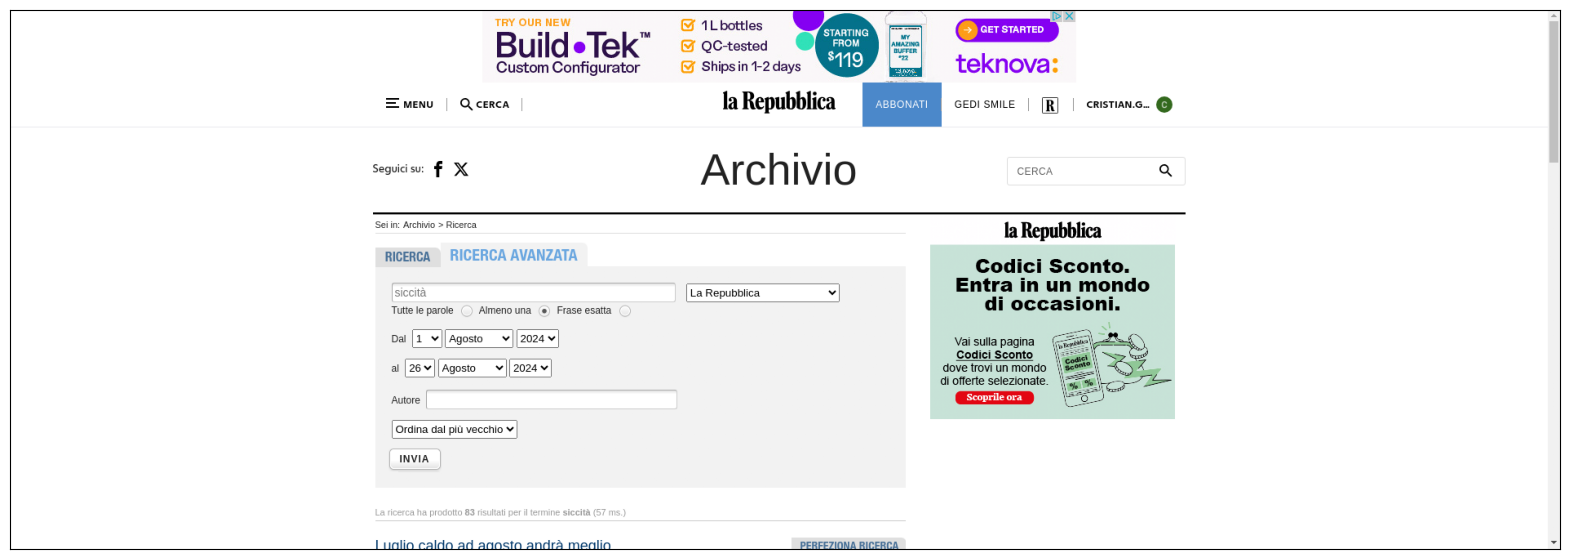

In [ ]:
show_page()

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

page = 1
seen_articles = []
seen_articles_url = []
seen_date = []
seen_text_articles = []

while True:
    try:
        # Carica la pagina di ricerca
        wd.get(f"https://ricerca.repubblica.it/ricerca/repubblica?query=siccit%C3%A0&fromdate=2024-08-01&todate=2024-08-26&sortby=adate&author=&mode=any&page={page}")

        # Attende che la pagina sia completamente caricata
        WebDriverWait(wd, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "section#lista-risultati > article"))
        )

        while True:
            # Riacquisisce la lista degli articoli su ogni iterazione
            list_articles = wd.find_elements(By.CSS_SELECTOR, "section#lista-risultati > article")

            # Se non ci sono più articoli, esce dal loop interno
            if not list_articles:
                print(f"No more articles found on page {page}. Exiting loop.")
                break

            # Processa ogni articolo nella lista
            new_article_found = False
            for article in list_articles:
                try:
                    article_title = article.find_element(By.CSS_SELECTOR, "a").text
                    url = article.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
                    date = article.find_element(By.TAG_NAME, "time").text

                    # Verifica se l'articolo è già stato visto
                    if article_title not in seen_articles:
                        # Vai all'URL dell'articolo
                        wd.get(url)

                        # Attende che l'articolo sia completamente caricato
                        WebDriverWait(wd, 10).until(
                            EC.presence_of_element_located((By.CSS_SELECTOR, "article"))
                        )

                        # Ri-acquisisce l'elemento <article> dopo il caricamento della pagina
                        article_element = wd.find_element(By.CSS_SELECTOR, "article")

                        # Estrai tutto il testo contenuto nei tag <p> all'interno di <article>
                        paragraphs = article_element.find_elements(By.CSS_SELECTOR, "p")
                        article_content = "\n".join([p.text for p in paragraphs])

                        # Salva i dati raccolti
                        seen_articles.append(article_title)
                        seen_articles_url.append(url)
                        seen_date.append(date)
                        seen_text_articles.append(article_content)

                        # Stampa i risultati
                        print(article_title)
                        print(url)
                        print(date)
                        print(article_content)
                        print()

                        new_article_found = True

                        # Torna alla pagina di ricerca
                        wd.back()

                        # Attendi che la pagina dei risultati si ricarichi
                        WebDriverWait(wd, 10).until(
                            EC.presence_of_element_located((By.CSS_SELECTOR, "section#lista-risultati > article"))
                        )

                        # Rompi il ciclo per riacquisire la lista degli articoli
                        break

                except Exception as e:
                    print(f"Error processing article: {e}")

            # Se nessun nuovo articolo è stato trovato nella pagina, esce dal ciclo interno
            if not new_article_found:
                print(f"No new articles found on page {page}. Exiting loop.")
                break

        # Incrementa il numero di pagina per analizzare la pagina successiva
        page += 1

        # Pausa tra le richieste per evitare di sovraccaricare il server
        time.sleep(5)

    except Exception as e:
        print(f"Error during page load or processing: {e}")
        break


Luglio caldo ad agosto andrà meglio
https://quotidiano.repubblica.it/edicola/searchdetail?id=http://archivio.repubblica.extra.kataweb.it/archivio/repubblica/2024/08/01/luglio-caldo-ad-agosto-andra-meglioNapoli19.html&hl=&query=siccit%C3%A0&field=nel+testo&testata=repubblica&newspaper=REP&edition=nazionale&zona=sfoglio&ref=search
01 agosto 2024

di Adriano Mazzarella
termico di luglio 2024 ricalca quello del 2022 e 2023 con la temperatura dell’aria, a eccezione dei primi giorni, sempre di 2-3°C al di sopra della media del periodo. Il bollente e umido anticiclone africano, alimentato da due centri di bassa pressione localizzati nell’oceano Atlantico e sull’Europa sud-orientale, si è impossessato del Mediterraneo e ha bloccato la normale circolazione atmosferica da Ovest verso Est.
Questo particolare scenario barico ha determinato un elevato tasso di umidità notturna e un notevole disagio nella popolazione, specie nel sud Italia. La media delle temperature massime è stata così di 32.5°C, 

In [ ]:
import pandas as pd

In [ ]:
#creo dataframe

data = {
    "Title": seen_articles,
    "URL": seen_articles_url,
	  "Date": seen_date,
	  "Text": seen_text_articles
}

df_Repubblica = pd.DataFrame(data)

In [ ]:
#export file --> test
file_path = "Repubblica.xlsx"
df_Repubblica.to_excel(file_path, index=False)

from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>